In [1]:
pip install pandas scikit-learn matplotlib numpy



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the updated dataset
file_path = 'F:\\VIDHI ROHIRA SY BTECH CE\\SEMESTER 3\\INHERITANCE\\Virtual_Interior_Designer\\src\\components\\RenovationEstimator\\updated_house_renovation_data.csv'
house_data = pd.read_csv(file_path)

# Features and target variable
X = house_data.drop(columns=['Total Renovation Cost (INR)'])
y = house_data['Total Renovation Cost (INR)']

# Updated numerical and categorical features
numerical_features = ['Bedrooms', 'Sqft Area', 'Price per Sqft (INR)', 'Toilets', 'House Age (years)']
categorical_features = ['Locality', 'Renovation Type', 'Material Quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor for scaling and encoding
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Pipeline for linear regression
linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = linear_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print(f"R^2 Score: {r2_lr}")


Linear Regression
R^2 Score: 0.42532372706669197


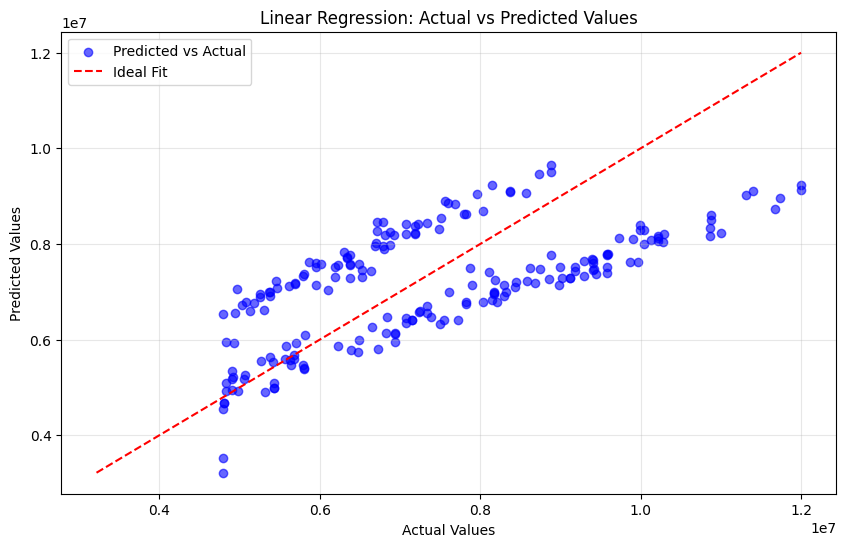

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the regression line (y=x for perfect prediction)
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')

# Plot settings
plt.title("Linear Regression: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [11]:
import pandas as pd

# Define the custom input with updated features
custom_input = [[3, 1200, 45000, 2, 10, 'Urban', 'Moderate', 'High']]

# Define the numerical and categorical feature names
numerical_features = ['Bedrooms', 'Sqft Area', 'Price per Sqft (INR)', 'Toilets', 'Age of Property (Years)']
categorical_features = ['Locality', 'Renovation Type', 'Construction Quality']

# Create a DataFrame for the custom input
custom_input_df = pd.DataFrame(custom_input, columns=numerical_features + categorical_features)

# Make the prediction
custom_prediction = linear_model.predict(custom_input_df)
print(f"Predicted Renovation Cost: {custom_prediction[0]} INR")


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error values
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 1219109.6783501806
Mean Squared Error (MSE): 1914011386255.7307
Root Mean Squared Error (RMSE): 1383478.0035315815
R^2 Score: 0.42532372706669197
